# Сборный проект "Стримчик"

## Описание проекта

Этот проект посвящён анализу данных о продажах компьютерных игр для выявления закономерностей, которые определяют успешность игр. Основная цель — сформировать рекомендации для выбора потенциально популярных продуктов и планирования рекламных кампаний.

**Цели и задачи**
- Провести исследовательский анализ данных (EDA) для изучения исторических данных о продажах, оценках пользователей и экспертов, жанрах и платформа;
- Выявить ключевые факторы, влияющие на успешность игр;
- Сформировать прогнозы и рекомендации для рекламной стратегии интернет-магазина игр на следующий год.

**Описание данных**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

### Импорт библиотек

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import stats as st

In [5]:
import seaborn as sns

### Знакомство с данными

In [6]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Проверка на на дубликаты

#### Проверка на явные дубликаты

In [7]:
data.duplicated().sum()

0

#### Проверка на неявные дубликаты

**Проверка на неявные дубликаты в названии платформ**

In [8]:
data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов не обнаружено

**Проверка на неявные дубликаты в названии жанров**

In [9]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Неявных дубликатов не обнаружено

**Проверка на неявные дубликаты в годах**

In [10]:
data['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Неявных дубликатов не обнаружено

In [11]:
# Комментарий ревьюера 01
temp = data.copy()
temp[temp[['Name', 'Platform','Year_of_Release']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


### Приведение к нижнему регистру названия столбцов

In [12]:
data.columns = data.columns.str.lower()
# Проверка
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков и формата данных

Оценим количество пропусков

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Оценим тип данных каждого стольца

In [14]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Обработка столбца `'user_score'`**

In [15]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

В данном столбце чаще всего у нас встречается значение 'tbd' (от английского "To Be Determined") означает, что рейтинг еще не определён. Заменим данное значение на `NaN`.

In [16]:
# Замена 'tbd' на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan)
# Преобразование столбца в числовой формат
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**Обработка столбца `'year_of_release'`**

Так как в столбца `'year_of_release'` всего 269 пропусков, то удалим их. Также переведем преобразуем данный столбец в формат `datetype`. При желании, по названию тайтла  можно вручную заполнить год релиза, но это потребует больших временных ресурсов, поэтому легче удалить. 

In [17]:
# Удаляем пропуски в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

In [18]:
# Переведем в формат DateTime
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
# Создадим столбец по годам в формате int
data['year_of_release_int'] = pd.DatetimeIndex(data['year_of_release']).year

**Обработка столбцов `'name'` и `'genre'`**

Столбцы `'name'` и `'genre'` в общей сложности имеют 4 пропуска, данные строки можно смело откинуть.

In [19]:
# Удаляем пропуски в стодбцах 'name' и 'genre'
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])

**Подсчет продаж**

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Создан новый столбец total_sales, где рассчитана сумма продаж в регионах: Северной Америке (`na_sales`), Европе (`eu_sales`), Японии (`jp_sales`) и других странах (`other_sales`).

**Вывод**

Пропуски в данных по столбцам могут быть вызваны следующими причинами:

1. `name` (Название игры): Ошибки ввода или отсутствие информации для малозначительных игр.
2. `genre` (Жанр): Ошибки ввода или сложности с классификацией некоторых игр.
3. `year_of_release` (Год выпуска): Отсутствие информации о релизе или задержка с её публикацией.
4. `critic_score` (Оценка критиков) и `user_score` (Оценка пользователей): Недостаток рецензий, особенно для малоизвестных или новых игр, либо отсутствие интереса со стороны критиков/пользователей.
4. `rating` (Возрастной рейтинг): Игра не сертифицирована, либо данные о рейтинге отсутствуют из-за ошибок ввода или неактуальности.

Эти пропуски могут быть результатом ограниченности доступных данных, человеческого фактора или несовершенства системы сбора информации.

**Проверка обработки**

In [21]:
# Проверим формат данных и наличие пропусков
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 16444 non-null  object        
 1   platform             16444 non-null  object        
 2   year_of_release      16444 non-null  datetime64[ns]
 3   genre                16444 non-null  object        
 4   na_sales             16444 non-null  float64       
 5   eu_sales             16444 non-null  float64       
 6   jp_sales             16444 non-null  float64       
 7   other_sales          16444 non-null  float64       
 8   critic_score         7983 non-null   float64       
 9   user_score           7463 non-null   float64       
 10  rating               9768 non-null   object        
 11  year_of_release_int  16444 non-null  int64         
 12  total_sales          16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7

name                      0
platform                  0
year_of_release           0
genre                     0
na_sales                  0
eu_sales                  0
jp_sales                  0
other_sales               0
critic_score           8461
user_score             8981
rating                 6676
year_of_release_int       0
total_sales               0
dtype: int64

1. Удалены пропуски в столбцах `name`, `year_of_release`, `genre`, а также значение `tbd` в `user_score` заменено на `NaN` для корректной обработки.
2. Создан дополнительный столбец `year_of_release_int`, в котором года приведены к формату `int` для дальнейшего анализа.
3. Пропуски в столбцах `critic_score`, `user_score` и `rating` оставлены без изменений, так как их замена на среднее или медиану могла бы исказить данные из-за их большого количества.
4. Создан новый столбец `total_sales`, где рассчитана сумма продаж во всех регионах

In [22]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 16444 non-null  object        
 1   platform             16444 non-null  object        
 2   year_of_release      16444 non-null  datetime64[ns]
 3   genre                16444 non-null  object        
 4   na_sales             16444 non-null  float64       
 5   eu_sales             16444 non-null  float64       
 6   jp_sales             16444 non-null  float64       
 7   other_sales          16444 non-null  float64       
 8   critic_score         7983 non-null   float64       
 9   user_score           7463 non-null   float64       
 10  rating               9768 non-null   object        
 11  year_of_release_int  16444 non-null  int64         
 12  total_sales          16444 non-null  float64       
dtypes: datetime64[ns](1), float64(7

## Исследовательский анализ данных

### Выпуск игр по годам

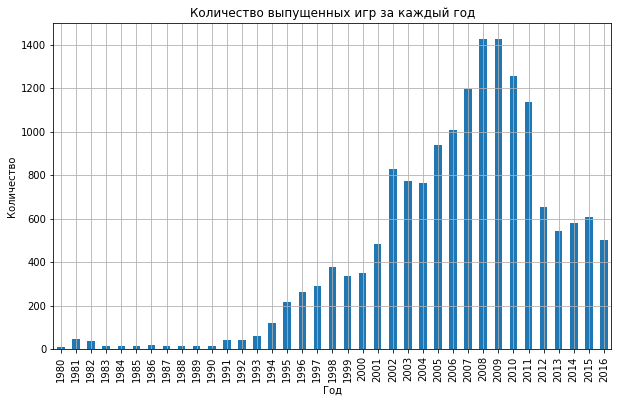

In [23]:
# Создаем сводную таблицу
games_per_year = data.pivot_table(index='year_of_release_int', values='name', aggfunc='count')
# Выводим график
games_per_year.plot(kind='bar',
                    figsize=(10, 6),
                    legend=False,
                    title='Количество выпущенных игр за каждый год',
                    xlabel='Год',
                    ylabel='Количество',
                    rot=90,
                    grid=True
                   )
plt.show()

**Предположения:**
- Пик в 2008 году связан с активным развитием индустрии, популярностью новых консолей (Xbox 360, PS3, Wii) и завершением крупных проектов, начатых до кризиса.
- В 2009 году количество выпускаемых игр начало снижаться, так как кризис начал оказывать влияние на финансирование и деятельность компаний.
- После 2009 года спад продолжился из-за сокращения бюджетов, закрытия студий и изменений в приоритетах рынка.

Не все данные являются существенными для анализа. В период с 80-х до начала 2000-х годов рынок видеоигр находился на стадии становления и набирал обороты. Данные за эти годы не отражают устойчивого состояния рынка, поэтому их нецелесообразно использовать для прогнозов. Они могут создавать шум и искажать результаты анализа современных тенденций.

### Продажи по платформам

In [24]:
# Определяем топ платформ с наибольшими суммарными продажами
top_platforms = data['platform'].value_counts().head(10).index
top_platforms

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB'], dtype='object')

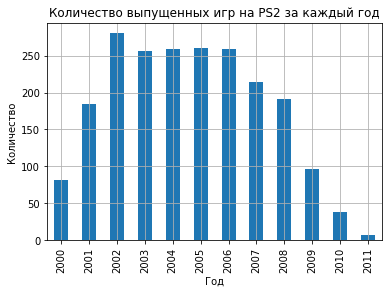

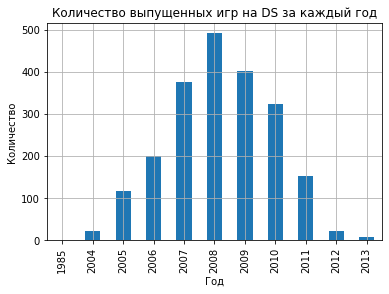

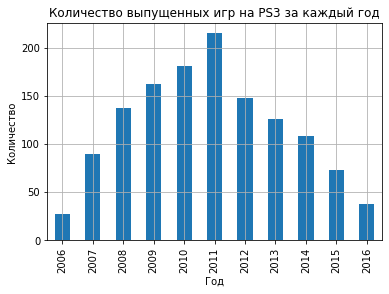

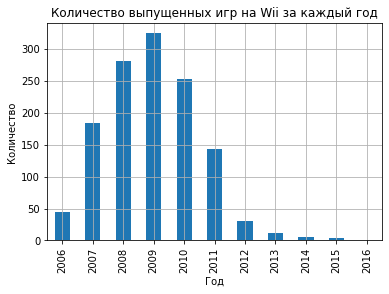

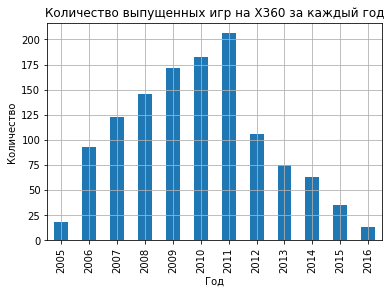

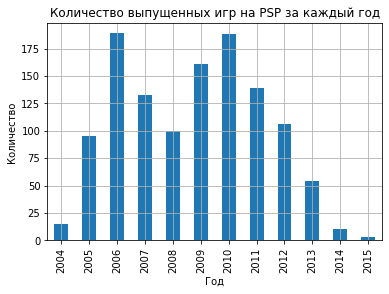

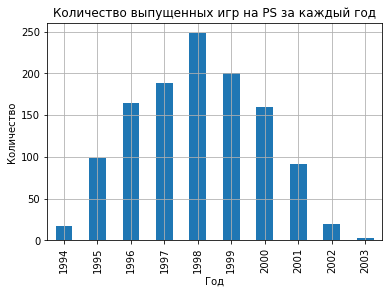

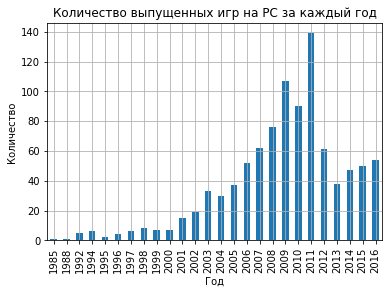

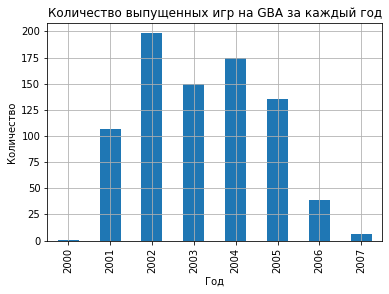

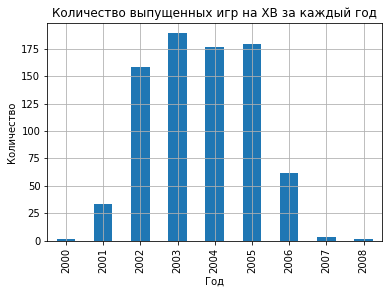

In [25]:
# Построение графиков для каждой платформы
for platform in top_platforms:
    # Фильтрация данных по текущей платформе
    platform_data = data[data['platform'] == platform]
    # Создание сводной таблицы
    platform_per_year = platform_data.pivot_table(index='year_of_release_int', values='name', aggfunc='count')
    # Выводим график
    platform_per_year.plot(kind='bar',
                           legend=False,
                           title=f'Количество выпущенных игр на {platform} за каждый год',
                           xlabel='Год',
                           ylabel='Количество',
                           rot=90,
                           grid=True)
    plt.show()                     

**Вывод**

Большинство платформ из топ-10 по продажам к 2016 году уже утратили свою актуальность или показали значительный спад продаж. Жизненный цикл игровой приставки составляет примерно 5–10 лет, после чего её заменяет новое поколение. Единственным исключением остаётся ПК, который сохраняет актуальность благодаря универсальности и возможности регулярного обновления мощности, в отличие от фиксированных моделей консолей, имеющих ограниченный срок актуальности.

### Определение актуального периода

Данные с 2012 года отражают актуальные тренды игровой индустрии, так как после этого периода рынок стабилизировался, и ключевые платформы, актуальные на 2016 год, продолжали активно развиваться. Данные до 2012 года включают платформы, которые уже утратили значимость (например, PS2, DS), а также периоды стремительного роста и падения, не отражающие современную рыночную ситуацию. Использование данных до 2012 года может ввести шум и исказить прогноз, поскольку они характеризуют устаревшие тенденции и платформы, неактуальные в 2017 году. Анализ с 2012 года позволяет сосредоточиться на текущих и перспективных трендах, что более корректно для прогнозирования.

In [27]:
# Фильтрация данных
data_current = data[data['year_of_release_int'] > 2011]
# Проверка фильтрации
data_current['year_of_release_int'].unique()

array([2013, 2015, 2012, 2014, 2016])

### Анализ актуальных платформ

In [28]:
top_platforms_current = data_current['platform'].value_counts().index
top_platforms_current

Index(['PS3', 'PSV', '3DS', 'PS4', 'X360', 'PC', 'XOne', 'PSP', 'WiiU', 'Wii',
       'DS'],
      dtype='object')

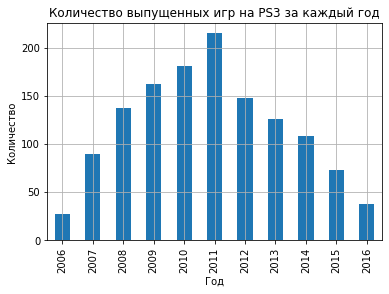

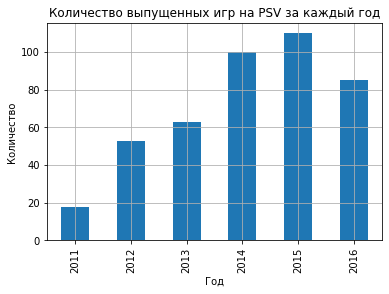

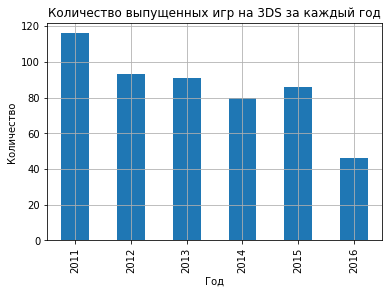

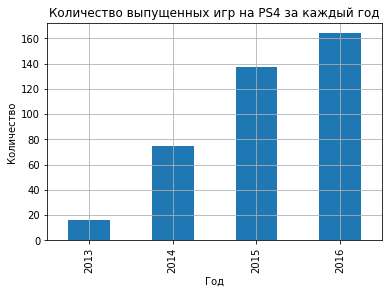

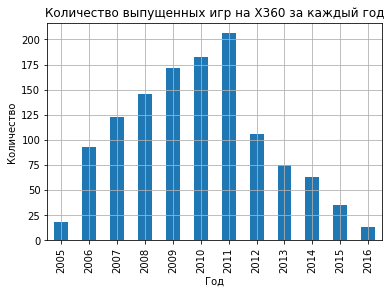

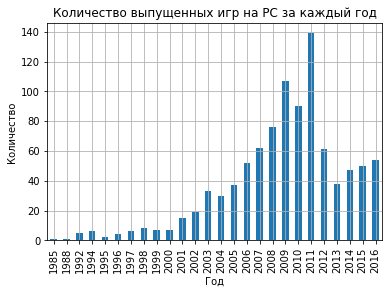

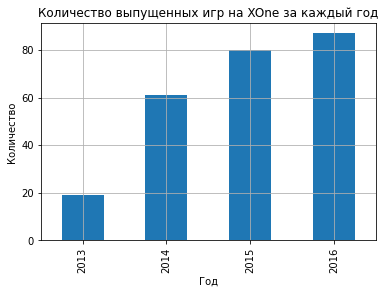

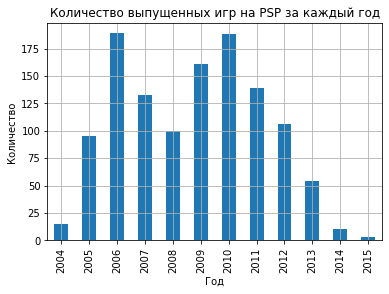

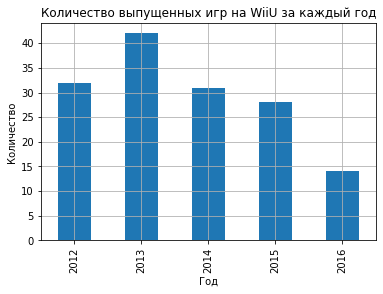

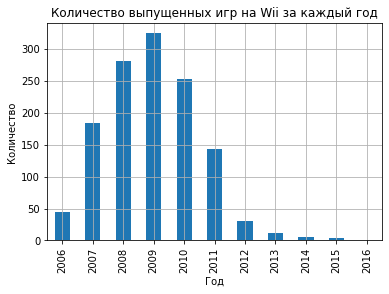

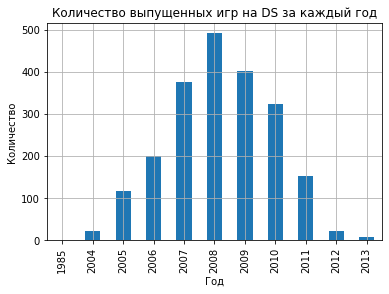

In [29]:
# Построение графиков для каждой платформы
for platform in top_platforms_current:
    # Фильтрация данных по текущей платформе
    platform_data = data[data['platform'] == platform]
    # Создание сводной таблицы
    platform_per_year = platform_data.pivot_table(index='year_of_release_int', values='name', aggfunc='count')
    # Выводим график
    platform_per_year.plot(kind='bar',
                           legend=False,
                           title=f'Количество выпущенных игр на {platform} за каждый год',
                           xlabel='Год',
                           ylabel='Количество',
                           rot=90,
                           grid=True)
    plt.show()                 

- **Растущие платформы:** PS4, PC, XOne — показывают положительную динамику продаж, что свидетельствует об их актуальности на рынке и высоком спросе.
- **Падающие платформы:** PS3, PSV — находятся на стадии спада, так как их жизненный цикл подходит к концу или не демонстрирует рост.
- **Платформы, утратившие актуальность:** X360, PSP, Wii, DS — больше не выпускаются или продажи на них резко сократились, что делает их нерелевантными для прогнозов.

**Потенциально прибыльные платформы:**
к потенциально прибыльным можно отнести PS4, PC и XOne, так как они демонстрируют устойчивый рост и сохраняют популярность у пользователей, что позволяет предположить их успешность в будущем.

### Глобальные продажи игр по платформам

In [30]:
# Формирование сводной таблицы
platform_sales = data_current.pivot_table(index='platform', values='total_sales', aggfunc='sum')
# Сортировка по убыванию
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
# Приведение название столбцов к одному уровню
platform_sales = platform_sales.reset_index()
# Вывод таблицы
platform_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


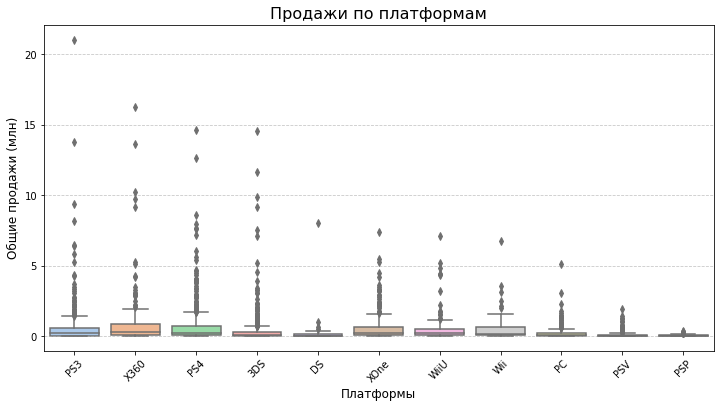

In [31]:
# Увеличение размера графика
plt.figure(figsize=(12, 6))

# Построение диаграммы размаха
sns.boxplot(
    data=data_current,  # Ваш актуальный DataFrame
    x='platform',       # Ось X — платформы
    y='total_sales',    # Ось Y — суммарные продажи
    palette='pastel'    # Цветовая палитра (необязательно)
)

# Настройки графика
plt.title('Продажи по платформам', fontsize=16)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Общие продажи (млн)', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей платформ для удобства чтения
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

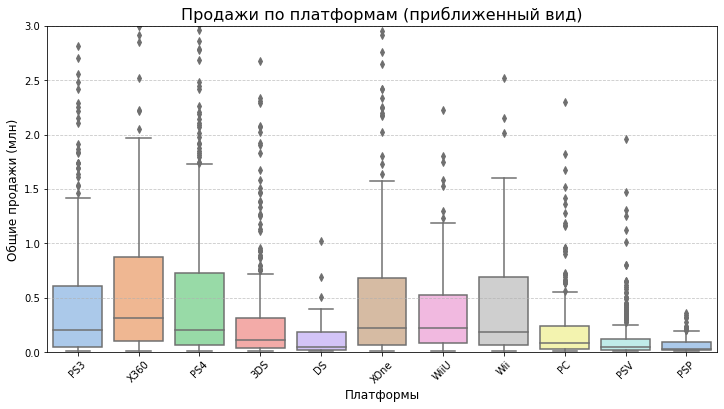

In [32]:
# Увеличение размера графика
plt.figure(figsize=(12, 6))

# Построение диаграммы размаха
sns.boxplot(
    data=data_current,  # Ваш актуальный DataFrame
    x='platform',       # Ось X — платформы
    y='total_sales',    # Ось Y — суммарные продажи
    palette='pastel'    # Цветовая палитра (необязательно)
)

# Настройки графика
plt.title('Продажи по платформам (приближенный вид)', fontsize=16)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Общие продажи (млн)', fontsize=12)
plt.xticks(rotation=45)  # Поворот подписей платформ для удобства чтения
plt.ylim(0, 3)  # Устанавливаем диапазон оси Y, чтобы приблизить график
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Отображение графика
plt.show()

**Обычный график:**

- У платформ PS4, Wii, DS и X360 наблюдаются значительные выбросы, что указывает на наличие отдельных игр с очень высокими продажами.
Большинство платформ имеют медианные продажи ниже 1 млн копий. Платформы PSP и PSV демонстрируют минимальные медианные значения.

**Приближенный график:**

- PS4, X360, Wii и DS показывают более высокие медианные продажи, отражая их популярность в игровом сегменте.
Платформы PSV и PSP остаются наименее успешными с самыми низкими медианными значениями, что свидетельствует о слабом спросе.

**Вывод:** PS4, Wii и X360 выделяются как лидеры по продажам с высокой популярностью и отдельными очень успешными играми. В то же время платформы PSP и PSV имеют наименьшие результаты, что может быть связано с ограниченной аудиторией или недостаточной поддержкой. Выбросы подчеркивают редкие случаи сверхпопулярных игр.

На графиках «ящик с усами» отображены глобальные продажи игр для топ-3 платформ PS4, PS3 и X360:

- **PS4:** Медианные продажи находятся на низком уровне, большинство игр имеют продажи менее 1 млн копий. Есть несколько крупных хитов, продажи которых превышают 10 млн копий (выбросы).
- **PS3:**Медианные продажи также низкие, большая часть игр продается менее чем на 1 млн копий.Наблюдаются значительные выбросы — хиты с продажами более 15 млн копий.
- **X360:** Продажи распределены схоже с PS3, медианные значения остаются низкими.Выбросы показывают наличие популярных игр, превышающих 10 млн копий в продажах.

**Вывод:**
- Все три платформы имеют большую долю игр с низкими продажами (менее 1 млн копий).
- На всех платформах наблюдаются хиты, которые достигают более 10 млн копий, что указывает на неравномерное распределение продаж (успех ограниченного числа игр).
- Медианные значения для всех платформ показывают, что подавляющее большинство игр продаётся в небольших объемах.

###  Корреляцию между отзывами и продажами на платформе PS4

In [33]:
# Создание датафрейма по платформе PS4
data_ps4 = data_current[data_current['platform'] == 'PS4']

**Корреляция между продажами и отзывами пользователей**

In [34]:
# Рассчет коэффициента корреляцяии
user_correlation=data_ps4['total_sales'].corr(data_ps4['user_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами пользователей: {user_correlation}')

Коэффициент корреляцяии между продажами и отзывами пользователей: -0.031957110204556376


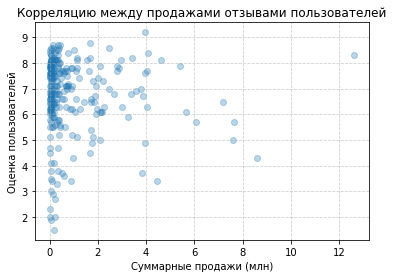

In [35]:
# Построение диаграммы рассеяния
plt.scatter(data_ps4['total_sales'], (data_ps4['user_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами пользователей')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка пользователей')
plt.grid(linestyle='--', alpha=0.6)

**Корреляция между продажами отзывами критиков**

In [36]:
# Рассчет коэффициента корреляцяии
critic_correlation=data_ps4['total_sales'].corr(data_ps4['critic_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами критиков: {critic_correlation}')

Коэффициент корреляцяии между продажами и отзывами критиков: 0.406567902061781


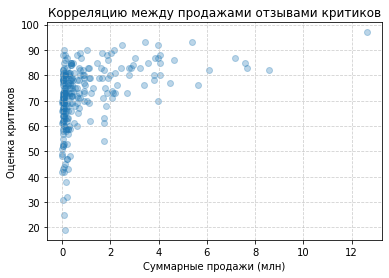

In [37]:
# Построение диаграммы рассеяния
plt.scatter(data_ps4['total_sales'], (data_ps4['critic_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами критиков')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка критиков')
plt.grid(linestyle='--', alpha=0.6)

**Вывод**

Корреляция между отзывами пользователей и продажами на платформе PS4 оказалась очень слабой и отрицательной (-0.03). Это указывает на отсутствие значимой связи между этими показателями. Отзывы пользователей, вероятно, менее важны при принятии решения о покупке и могут быть слишком субъективными. На диаграмме рассеяния видно хаотичное распределение точек, что подтверждает этот вывод.

В то же время, корреляция между оценками критиков и продажами составляет 0.41, что свидетельствует об умеренной положительной связи. Это говорит о том, что высокие оценки критиков могут способствовать росту продаж, особенно для крупных релизов. На диаграмме рассеяния заметна тенденция увеличения продаж с ростом оценок критиков, хотя разброс значений всё ещё значителен. Таким образом, оценки критиков оказывают большее влияние на успех игры, чем отзывы пользователей.

###  Корреляция между отзывами и продажами на других платформах

#### Соотношение на PC

In [38]:
# Создание датафрейма по платформе PC
data_pc = data_current[data_current['platform'] == 'PC']

**Корреляция между продажами и отзывами пользователей**

In [39]:
# Рассчет коэффициента корреляцяии
user_correlation_pc=data_pc['total_sales'].corr(data_pc['user_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами пользователей: {user_correlation_pc}')

Коэффициент корреляцяии между продажами и отзывами пользователей: -0.12186747630735577


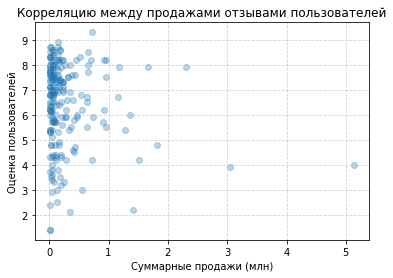

In [40]:
# Построение диаграммы рассеяния
plt.scatter(data_pc['total_sales'], (data_pc['user_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами пользователей')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка пользователей')
plt.grid(linestyle='--', alpha=0.6)

**Корреляция между продажами отзывами критиков**

In [41]:
# Рассчет коэффициента корреляцяии
critic_correlation_pc=data_pc['total_sales'].corr(data_pc['critic_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами критиков: {critic_correlation_pc}')

Коэффициент корреляцяии между продажами и отзывами критиков: 0.23724324311567918


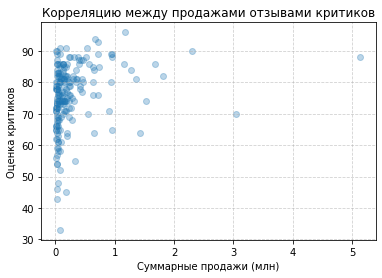

In [42]:
# Построение диаграммы рассеяния
plt.scatter(data_pc['total_sales'], (data_pc['critic_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами критиков')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка критиков')
plt.grid(linestyle='--', alpha=0.6)

**Отзывы игроков (`user_score`):**

Коэффициент корреляции между отзывами игроков и продажами на платформе PC составляет -0.12, что сильнее отрицательно, чем на PS4 (-0.03).
Отрицательная корреляция также указывает на отсутствие связи между оценками пользователей и продажами. На PC это может быть связано с большим количеством инди-игр и субъективностью аудитории, которая часто оценивает игры строже.

**Отзывы критиков (`critic_score`):**

Коэффициент корреляции между отзывами критиков и продажами на платформе PC составляет 0.24, что ниже, чем на PS4 (0.41).
Эта умеренная положительная корреляция говорит о том, что влияние критиков на продажи присутствует, но оно менее выражено по сравнению с PS4. Возможно, на PC продажи больше зависят от других факторов, таких как эксклюзивные проекты, скидки и репутация разработчиков.

#### Соотношение на XOne

In [43]:
# Создание датафрейма по платформе PC
data_xone = data_current[data_current['platform'] == 'XOne']

**Корреляция между продажами и отзывами пользователей**

In [44]:
# Рассчет коэффициента корреляцяии
user_correlation_xone=data_xone['total_sales'].corr(data_xone['user_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами пользователей: {user_correlation_xone}')

Коэффициент корреляцяии между продажами и отзывами пользователей: -0.06892505328279412


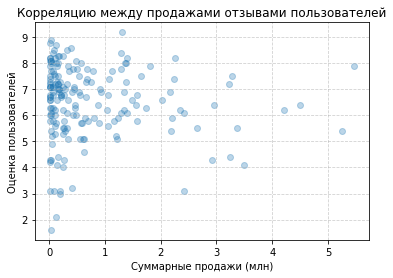

In [45]:
# Построение диаграммы рассеяния
plt.scatter(data_xone['total_sales'], (data_xone['user_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами пользователей')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка пользователей')
plt.grid(linestyle='--', alpha=0.6)

**Корреляция между продажами отзывами критиков**

In [46]:
# Рассчет коэффициента корреляцяии
critic_correlation_xone=data_xone['total_sales'].corr(data_xone['critic_score'])
print(f'Коэффициент корреляцяии между продажами и отзывами критиков: {critic_correlation_xone}')

Коэффициент корреляцяии между продажами и отзывами критиков: 0.41699832800840175


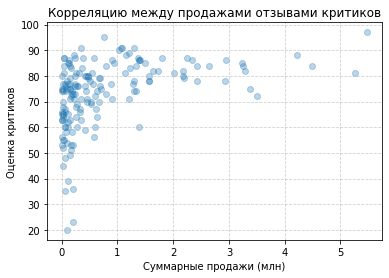

In [47]:
# Построение диаграммы рассеяния
plt.scatter(data_xone['total_sales'], (data_xone['critic_score']), alpha=0.3)
plt.title('Корреляцию между продажами отзывами критиков')
plt.xlabel('Суммарные продажи (млн)')
plt.ylabel('Оценка критиков')
plt.grid(linestyle='--', alpha=0.6)

- **Отзывы пользователей:** На Xbox One влияние отзывов пользователей также практически отсутствует, как и на PS4 и PC. Это общая тенденция для всех платформ.
- **Отзывы критиков:** Влияние критиков на Xbox One схоже с PS4 (коэффициент корреляции около 0.4). На PC влияние критиков ниже (0.24), что может быть связано с особенностями рынка игр для этой платформы.

#### Сравнение коэффициентов корреляцяии для актуальных платформ

In [48]:
# Создадим новый датафрейм, в котром будет храниться данные по корреляцяии
# Создание столбцов
columns = ['platform', 'critic_correlation', 'critic_correlation']
# Создание данных
data_coff = [
    ['PS4', user_correlation, critic_correlation],
    ['PC', user_correlation_pc, critic_correlation_pc],
    ['XOne', user_correlation_xone, critic_correlation_xone]
]
platform_comparison = pd.DataFrame(data_coff, columns=columns)
platform_comparison

,platform,critic_correlation,critic_correlation
0,PS4,-0.031957,0.406568
1,PC,-0.121867,0.237243
2,XOne,-0.068925,0.416998


**Корреляция с отзывами пользователей:**

На всех трёх платформах влияние оценок пользователей на продажи крайне низкое и даже отрицательное (например, на PS4: -0.031, на PC: -0.122, на XOne: -0.069). Это может быть связано с тем, что пользователи дают оценки уже после покупок, и эти оценки, вероятно, не играют значительной роли в стимулировании продаж.

**Корреляция с отзывами критиков:**

Для всех платформ заметно более высокая корреляция с оценками критиков, особенно для XOne (0.417) и PS4 (0.407). Это свидетельствует о том, что положительные оценки критиков могут существенно повлиять на продажи, поскольку рецензии зачастую предшествуют массовым покупкам.

**Выводы для маркетинговых стратегий:**

- Оценки пользователей: Слабое влияние на продажи, поэтому на данном этапе не стоит делать на них упор.
- Оценки критиков: Высокая корреляция показывает важность профессиональных рецензий для стимулирования продаж.Инвестиции в рекламные кампании и публикацию отзывов от влиятельных критиков могут быть полезными.

Таким образом, платформы PS4 и XOne демонстрируют схожие тренды в значимости критических оценок, что подтверждает важность работы с профессиональными рецензиями для повышения продаж.

###  Топ жанров

####  Распределение жанров по количеству проданных игр

In [49]:
# Создание сводной таблицы
top_genre = (
    data_current.pivot_table(index='genre', values='name', aggfunc='count')
    .sort_values(by='name', ascending=False)
    .reset_index()
)
top_genre

,genre,name
0,Action,1031
1,Role-Playing,370
2,Adventure,302
3,Sports,268
4,Shooter,235
5,Misc,192
6,Racing,115
7,Fighting,109
8,Platform,85
9,Simulation,80


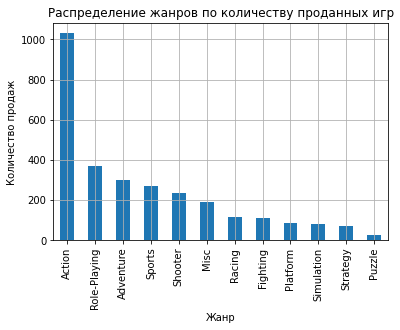

In [50]:
# Создание графика
top_genre.plot(kind='bar',
               title='Распределение жанров по количеству проданных игр',
               xlabel ='Жанр',
               ylabel='Количество продаж',
               x='genre',
               legend=False,
               grid = True);

####  Топ жанров по медианным продажам

In [51]:
# Создание сводной таблицы
top_genre_sales = (
    data_current.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
top_genre_sales

,genre,total_sales
0,Shooter,0.440
1,Sports,0.240
2,Platform,0.210
3,Role-Playing,0.140
4,Racing,0.140
5,Fighting,0.130
6,Action,0.120
7,Misc,0.120
8,Simulation,0.120
9,Strategy,0.080


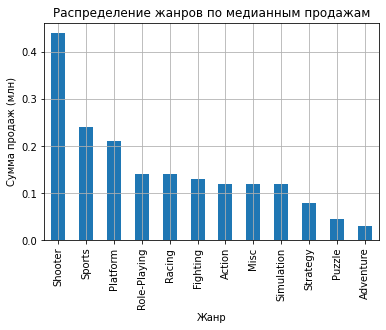

In [52]:
# Создание графика
top_genre_sales.plot(kind='bar',
                     title='Распределение жанров по медианным продажам',
                     x='genre',
                     xlabel='Жанр',
                     ylabel='Сумма продаж (млн)',
                     legend=False,
                     grid=True);

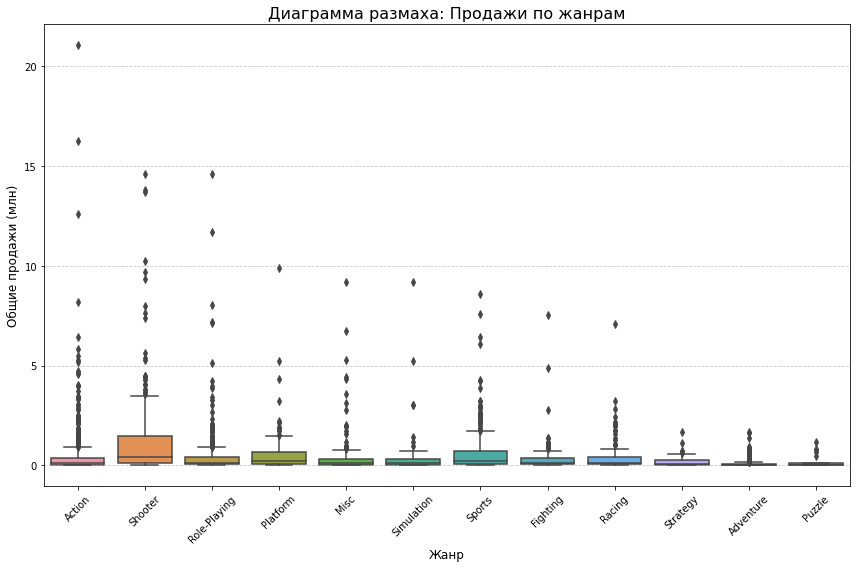

In [53]:
# Построение диаграммы размаха
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_current, x='genre', y='total_sales')
plt.title("Диаграмма размаха: Продажи по жанрам", fontsize=16)
plt.xlabel("Жанр", fontsize=12)
plt.ylabel("Общие продажи (млн)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Вывод

1. Жанры по медианным продажам:
- На основе медианных продаж лидером является жанр `Shooter` с медианным значением продаж 0.44 млн, что отражает стабильный спрос на игры этого жанра.
- Второе место занимают жанры `Sports` и `Platform` с медианными продажами 0.24 млн и 0.21 млн соответственно. Эти жанры также демонстрируют устойчивую популярность среди игроков.
- `Role-Playing` и `Racing` замыкают пятерку лидеров с медианными значениями 0.14 млн.
- Жанры `Puzzle`, `Strategy`, и `Adventure` имеют самые низкие показатели медианных продаж, что свидетельствует о меньшем устойчивом спросе на них.

Медианные продажи более точно отражают стабильность жанров, исключая влияние отдельных успешных игр.

2. Жанры по количеству проданных игр:
- Жанры `Action` и `Role-Playing` лидируют по количеству выпущенных игр, что говорит о популярности и большом предложении игр в этих категориях.
Жанры `Shooter`, `Sports`, и `Adventure` находятся в средней части распределения, что свидетельствует о более нишевой, но прибыльной аудитории.
Заключение: Популярные жанры, такие как `Action`, `Shooter`, и `Role-Playing`, не только лидируют по продажам, но и выпускаются в большом количестве, что делает их прибыльными. Жанры `Adventure` и `Strategy` показывают низкий уровень продаж, вероятно, из-за более узкой целевой аудитории.

### Вывод по анализу данных

- **Выпуск игр по годам:** Пик выпуска игр приходится на середину 2000-х годов, с последующим спадом, связанным с увеличением затрат на разработку.
- **Продажи по платформам:** Продажи варьируются в зависимости от платформ, лидеры – консоли с большим количеством игр и устойчивой аудиторией.
- **Определение актуального периода:** Для анализа выбраны последние годы, чтобы отразить актуальные рыночные тренды.
- **Анализ актуальных платформ:** Среди платформ выделяются устойчивые лидеры, однако наблюдается рост новых платформ, требующий изучения.
- **Глобальные продажи игр по платформам:** Продажи внутри платформ сильно различаются, что подтверждается наличием хитов и широкого диапазона значений.
- **Корреляция между отзывами и продажами:** Отзывы критиков оказывают большее влияние на продажи, чем пользовательские отзывы, что прослеживается на нескольких платформах.
- **Топ жанров:** Лидеры по суммарным продажам отличаются от жанров с высокими медианными показателями, что важно учитывать для устойчивых инвестиций.
- **Диаграммы размаха:** Диаграммы подтверждают значительную вариативность продаж внутри жанров и платформ, что указывает на влияние отдельных успешных проектов.
- **Итог:** Анализ показал ключевые платформы, жанры и влияние отзывов на продажи. Будущее развитие игр стоит фокусировать на стабильных жанрах и поддержке актуальных платформ.

## Портрет пользователей регионов

### Самые популярные платформы

#### Северная Америка

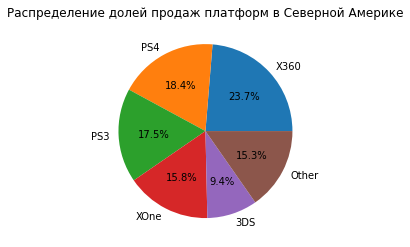

In [54]:
# Расчет долей продаж для Северной Америки
platform_sales = (
    data_current.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)

# Создание категории "Other" для всех платформ за пределами топ-5
top5_platforms = platform_sales.head(5).copy()  # Копируем данные топ-5 платформ
other_sales = platform_sales.iloc[5:].sum()  # Суммируем продажи остальных платформ

# Добавляем категорию "Other" в таблицу топ-5
top5_platforms.loc['Other'] = other_sales

# Рассчет долей
top5_platforms.loc[:, 'share_na'] = top5_platforms['na_sales'] / top5_platforms['na_sales'].sum()

# Построение круговой диаграммы
top5_platforms['share_na'].plot(
    kind='pie',
    labels=top5_platforms.index,
    autopct='%1.1f%%',
    title='Распределение долей продаж платформ в Северной Америке',
    ylabel=''
);

#### Европа

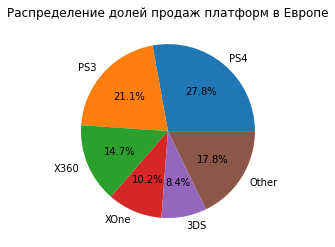

In [55]:
# Расчет долей продаж для Европы
platform_sales_eu = (
    data_current.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)

# Создание категории "Other" для всех платформ за пределами топ-5
top5_platforms_eu = platform_sales_eu.head(5).copy()  # Копируем данные топ-5 платформ
other_sales_eu = platform_sales_eu.iloc[5:].sum()  # Суммируем продажи остальных платформ

# Добавляем категорию "Other" в таблицу топ-5
top5_platforms_eu.loc['Other'] = other_sales_eu

# Рассчет долей
top5_platforms_eu.loc[:, 'share_eu'] = top5_platforms_eu['eu_sales'] / top5_platforms_eu['eu_sales'].sum()

# Построение круговой диаграммы
top5_platforms_eu['share_eu'].plot(
    kind='pie',
    labels=top5_platforms_eu.index,
    autopct='%1.1f%%',
    title='Распределение долей продаж платформ в Европе',
    ylabel=''
);

#### Япония

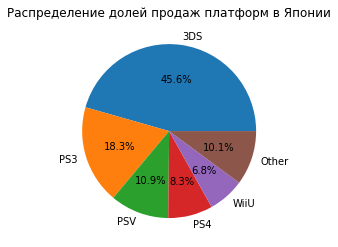

In [56]:
# Расчет долей продаж для Японии
platform_sales_jp = (
    data_current.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)

# Создание категории "Other" для всех платформ за пределами топ-5
top5_platforms_jp = platform_sales_jp.head(5).copy()  # Копируем данные топ-5 платформ
other_sales_jp = platform_sales_jp.iloc[5:].sum()  # Суммируем продажи остальных платформ

# Добавляем категорию "Other" в таблицу топ-5
top5_platforms_jp.loc['Other'] = other_sales_jp

# Рассчет долей
top5_platforms_jp.loc[:, 'share_jp'] = top5_platforms_jp['jp_sales'] / top5_platforms_jp['jp_sales'].sum()

# Построение круговой диаграммы
top5_platforms_jp['share_jp'].plot(
    kind='pie',
    labels=top5_platforms_jp.index,
    autopct='%1.1f%%',
    title='Распределение долей продаж платформ в Японии',
    ylabel=''
);

### Самые популярные жанры

#### Северная Америка

In [57]:
# Создание сводной таблицы топ-5 жанров в Северной Америке
top5_genre_na = (
    data_current.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
)
top5_genre_na

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


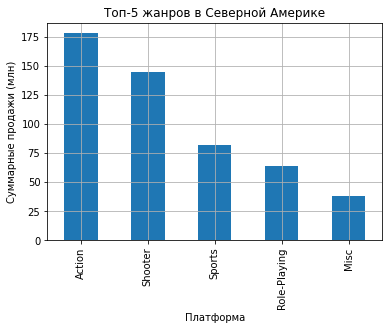

In [58]:
# Вывод графика топ-5 жанров в Северной Америке
top5_genre_na['na_sales'].plot(
    kind='bar',
    title='Топ-5 жанров в Северной Америке',
    xlabel='Платформа',
    ylabel='Суммарные продажи (млн)',
    grid=True
);

#### Европа

In [59]:
# Создание сводной таблицы топ-5 жанров в Европе
top5_genre_eu = (
    data_current.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
)
top5_genre_eu

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


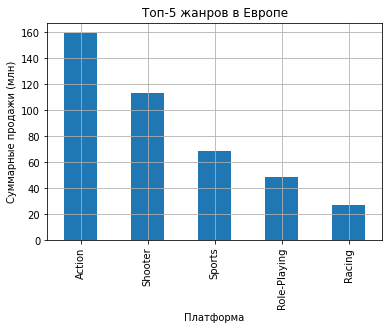

In [60]:
# Вывод графика топ-5 жанров в Европе
top5_genre_eu['eu_sales'].plot(
    kind='bar',
    title='Топ-5 жанров в Европе',
    xlabel='Платформа',
    ylabel='Суммарные продажи (млн)',
    grid=True
);

#### Япония

In [61]:
# Создание сводной таблицы топ-5 жанров в Японии
top5_genre_jp = (
    data_current.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
)
top5_genre_jp

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


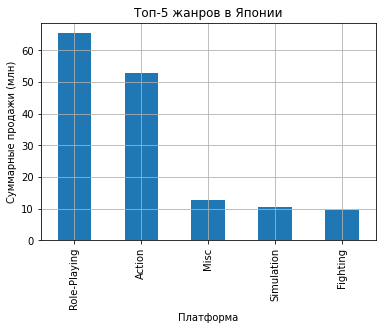

In [62]:
# Вывод графика топ-5 жанров в Японии
top5_genre_jp['jp_sales'].plot(
    kind='bar',
    title='Топ-5 жанров в Японии',
    xlabel='Платформа',
    ylabel='Суммарные продажи (млн)',
    grid=True
);

### Влияние рейтинга ESRB на продажи

**Система ESRB**
1. `E` - для всех возрастных категорий
2. `E10+` - для лиц старше 10 лет
3. `T` - для лиц старше 13 лет
4. `M` - для лиц старше 17 лет

#### Северная Америка

In [63]:
top_esrb_na = (
    data_current.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
)
top_esrb_na

,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


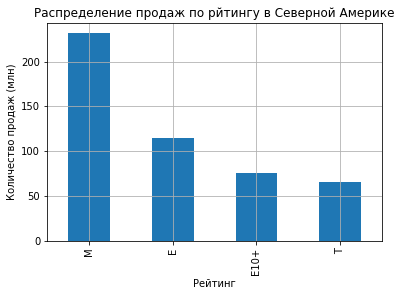

In [64]:
top_esrb_na.plot(kind='bar',
                 title='Распределение продаж по рйтингу в Северной Америке',
                 xlabel='Рейтинг',
                 ylabel='Количество продаж (млн)',
                 legend=False,
                 grid=True);

#### Европа

In [65]:
top_esrb_eu = (
    data_current.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
)
top_esrb_eu

,eu_sales
rating,
M,193.96
E,113.03
E10+,55.37
T,52.96


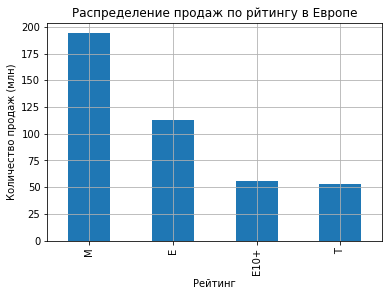

In [66]:
top_esrb_eu.plot(kind='bar',
                 title='Распределение продаж по рйтингу в Европе',
                 xlabel='Рейтинг',
                 ylabel='Количество продаж (млн)',
                 legend=False,
                 grid=True);

#### Япония

In [67]:
top_esrb_jp = (
    data_current.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
)
top_esrb_jp

,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


In [ ]:
top_esrb_jp.plot(kind='bar',
                 title='Распределение продаж по рйтингу в Японии',
                 xlabel='Рейтинг',
                 ylabel='Количество продаж (млн)',
                 legend=False,
                 grid=True);

In [69]:
# Комментарий ревьюера
temp = data_current.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

1275 0.4417879417879418


NaN     1275
M        498
T        412
E        395
E10+     306
Name: rating, dtype: int64

### Портеры пользователей по регионам

#### Северная Америка

- **Самые популярные платформы (топ-5):**
Самые популярные платформы (топ-5): Наиболее популярной платформой в Северной Америке является Xbox 360 с долей 23.7% от общих продаж. На втором месте PS4 (18.4%), следом идет PS3 (17.5%). Xbox One занимает четвёртое место с долей 15.8%, а 3DS замыкает пятёрку с долей 9.4%. Все остальные платформы объединены в категорию "Other" с суммарной долей 15.3%.

- **Самые популярные жанры (топ-5):**
Жанр Action лидирует с 177.84 млн продаж, следом идут Shooter (144.77 млн) и Sports (81.53 млн). Ролевые игры (Role-Playing) занимают четвёртую позицию, а Miscellaneous замыкает список. В Северной Америке популярны жанры, ориентированные на активный геймплей и спортивные симуляторы.

- **Влияние рейтинга ESRB на продажи:**
Игры с рейтингом "M" (для взрослых) доминируют в Северной Америке с 231.57 млн продаж, что существенно больше, чем у игр с рейтингом "E" (всем возрастам), у которых 114.37 млн. Это свидетельствует о значительном спросе на игры для взрослой аудитории.








#### Европа

- **Самые популярные платформы (топ-5):**
Самые популярные платформы (топ-5): В Европе лидирует PS4 с долей 27.8% от общего объема продаж. На втором месте PS3 (21.1%), далее идет Xbox 360 (14.7%). Xbox One занимает четвёртую позицию с долей 10.2%, а 3DS находится на пятом месте с долей 8.4%. Все оставшиеся платформы объединены в категорию "Other" с долей 17.8%.

- **Самые популярные жанры (топ-5):**
Первое место занимает жанр Action с 159.34 млн продаж, на втором месте Shooter с 113.47 млн. Спортивные игры (Sports) находятся на третьей позиции с 69.09 млн, а Role-Playing и Racing занимают четвёртую и пятую позиции соответственно. В Европе жанры Action и Shooter значительно опережают другие жанры по популярности.

- **Влияние рейтинга ESRB на продажи:**
Игры с рейтингом "M" (для взрослых) лидируют по продажам с 193.96 млн. На втором месте игры с рейтингом "E" (всем возрастам) с 113.03 млн. Рейтинги "E10+" и "T" занимают третье и четвёртое места с 55.37 млн и 52.96 млн соответственно. В Европе заметен спрос на игры с рейтингом "M", но также хорошо продаются игры для всех возрастов.

#### Япония

- **Самые популярные платформы (топ-5):**
Самые популярные платформы (топ-5): Лидером по продажам в Японии является 3DS с долей 45.6%. На втором месте PS3 (18.3%), далее идет PSV с долей 10.9%. Четвёртую позицию занимает PS4 (8.3%), а WiiU находится на пятом месте с долей 6.8%. Остальные платформы составляют категорию "Other" с долей 10.1%.

- **Самые популярные жанры (топ-5):**
Лидером по жанрам в Японии являются ролевые игры (Role-Playing) с 65.44 млн продаж. Action занимает вторую позицию с 52.80 млн. Замыкают топ жанры Misc (12.86 млн), Simulation (10.41 млн) и Fighting (9.44 млн). Ролевые игры значительно превосходят другие жанры, подчёркивая их особую популярность в Японии.

- **Влияние рейтинга ESRB на продажи:**
Игры с рейтингом "E" (для всех возрастов) доминируют в японском регионе с 28.33 млн продаж. Рейтинг "T" (для подростков) следует с 26.02 млн, а рейтинг "M" (для взрослых) занимает третье место с 21.20 млн. Рейтинг "E10+" показывает наименьшие продажи (8.19 млн), что указывает на менее выраженный интерес к играм для аудитории старше 10 лет.

#### Сравнение регионов
1. **Популярность платформ:**
- **Северная Америка:** Лидерами являются платформы от Microsoft — Xbox 360 (23.7%) и Xbox One (15.8%), что связано с успешным региональным маркетингом и сильной экосистемой Xbox, ориентированной на американский рынок. На третьем месте PS4 (18.4%), которая конкурирует с Xbox благодаря популярности эксклюзивных игр. PS3 (17.5%) показывает стабильный интерес, а 3DS (9.4%) замыкает топ благодаря популярности портативного формата.
- **Европа:** Пользователи отдают предпочтение платформам Sony. PS4 занимает первое место (27.8%), за ней следует PS3 (21.1%), демонстрируя доминирование Sony в регионе. Xbox 360 (14.7%) занимает третье место, уступая позициям Sony. Xbox One (10.2%) и 3DS (8.4%) имеют меньшие доли, отражая предпочтения европейских пользователей к стационарным платформам и эксклюзивным играм.
- **Япония:** Абсолютным лидером становится Nintendo 3DS (45.6%), что связано с популярностью портативных устройств и локализованных игр. PS3 (18.3%) занимает второе место, а PSV (10.9%) подтверждает высокую востребованность портативных консолей в Японии. PS4 (8.3%) и WiiU (6.8%) замыкают пятёрку, но их доли значительно уступают, что связано с локальными особенностями рынка и предпочтением японских пользователей к портативным устройствам.
2. **Жанровые предпочтения:**
- **Северная Америка и Европа:** Action и Shooter доминируют, отражая популярность динамичных игр с экшен-геймплеем.
- **Япония:** Role-Playing занимает первое место, что связано с национальной приверженностью к сюжетным и стратегическим играм.
3. **Рейтинги ESRB:**
- **Северная Америка и Европа:** Лидируют игры с рейтингом "M", показывая высокий спрос на взрослый контент.
- **Япония:** В приоритете игры с рейтингом "E", ориентированные на семейную аудиторию.

**Основные причины различий:**

- **Культурные предпочтения:** Япония отдает предпочтение портативным устройствам и сюжетным играм, тогда как западные регионы выбирают динамичные экшен-игры.
- **Возрастная структура:** Западные рынки доминируют взрослые игроки, тогда как в Японии популярны игры для всей семьи.
- **Региональный маркетинг:** Microsoft активно продвигает Xbox в Северной Америке, Sony успешно фокусируется на Европе, а Nintendo доминирует в Японии.







## Проверка гипотез

### Гипотеза № 1


- **Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- **Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC не равны.
- **Тип гипотезы:** Двусторонняя (проверяем, есть ли разница в любую сторону).
- **Метод:** t-тест для независимых выборок (scipy.stats.ttest_ind).

In [70]:
# Фильтрация данных
xone_data = data_current[data_current['platform']=='XOne']
pc_data = data_current[data_current['platform']=='PC']

# Извлечение данные о рейтингах
xone_rating = xone_data['user_score']
pc_rating = pc_data['user_score']

# Удаление NaN из данных
xone_rating_clean = xone_rating.dropna()
pc_rating_clean = pc_rating.dropna()

# Уровень значимости
alpha = 0.05

# Двухвыборочный t-тест
results = st.ttest_ind(xone_rating_clean, pc_rating_clean)

# Вывод pvalue:
print('p значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотеху')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p значение: 0.5535080500643661
Не удалось отвергнуть нулевую гипотезу


**Вывод**

Ихсходя из проведенного t-теста, среднее значения пользовательских рейтингов платформ Xbox One и PC статитически 
одинаковые, так как p-значение (p-value), чем статистическая значимость (alpha).

### Гипотеза № 2

- **Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports равны.
- **Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.
- **Тип гипотезы:** Двусторонняя (проверяем, есть ли разница в любую сторону).
- **Метод:** t-тест для независимых выборок (scipy.stats.ttest_ind).

In [71]:
# Фильтрация данных
action_data = data_current[data_current['genre']=='Action']
sports_data = data_current[data_current['genre']=='Sports']

# Извлечение данные о рейтингах
action_rating = action_data['user_score']
sports_rating = sports_data['user_score']

# Удаление NaN из данных
action_rating = action_rating.dropna()
sports_rating = sports_rating.dropna()

# Уровень значимости
alpha = 0.05

# Двухвыборочный t-тест
results_genre = st.ttest_ind(action_rating, sports_rating)

# Вывод pvalue:
print('p значение:', results_genre.pvalue)

if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотеху')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p значение: 3.7163089460934874e-26
Отвергаем нулевую гипотеху


**Вывод**

Ихсходя из проведенного t-теста, среднее значения пользовательских рейтингов жанров Action и Sports не равнны, так как p-значение (p-value) намного ниже, чем статистическая значимость (alpha).

**Вывод о формулировании гипотез**

1. **Нулевая гипотеза (H₀):**
   Нулевая гипотеза всегда предполагает, что значимых различий между выборками нет.
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
   - Средние пользовательские рейтинги жанров Action и Sports равны.
   
   
2. **Альтернативная гипотеза (Hₐ):**
   Альтернативная гипотеза предполагает, что различия существуют. 
   - Средние пользовательские рейтинги платформ Xbox One и PC различны.
   - Средние пользовательские рейтинги жанров Action и Sports различны.
   
   
3. **Принцип проверки:**
   Гипотезы проверяются с использованием p-значения, которое сравнивается с уровнем значимости (обычно 0.05). Если p-значение меньше уровня значимости, нулевая гипотеза отвергается в пользу альтернативной. В противном случае нулевая гипотеза не отвергается, что означает отсутствие доказательств для её отклонения.


## Общий вывод по проекту "Стримчик"


1. **Подготовка данных**
В рамках подготовки данных выполнены следующие шаги:
- Проведен анализ данных для выявления пропусков и их заполнения либо корректной обработки. Пропуски в некоторых столбцах, таких как `year_of_release` и `rating`, обоснованы либо недостатком информации, либо отсутствием оценки игр.
- Проверены явные и неявные дубликаты. Для неявных дубликатов были применены методы унификации названий игр.
- Названия столбцов приведены к единому нижнему регистру.
- Устранены ошибки в форматах данных, например, преобразование `user_score` в числовой тип.

2. **Исследовательский анализ данных**
Анализ выполнен для понимания общих тенденций и особенностей рынка:
- Определено распределение выпуска игр по годам. Замечено снижение активности в последние годы, что связано с ростом конкуренции и снижением интереса к малым проектам.
- Проведен анализ продаж по платформам. Были выявлены лидеры среди платформ, а также определен период, подходящий для анализа актуальных данных.
- Глобальные продажи платформ исследованы с помощью диаграмм размаха, включая построение масштабированных визуализаций.
- Рассмотрена корреляция между отзывами критиков и пользователей с продажами. Для платформ, таких как PS4, связь оказалась умеренной, а для других платформ зависимость была менее выраженной.
- Анализ жанров игр показал как распределение по количеству выпущенных игр, так и по медианным продажам, что позволило выделить наиболее стабильные и прибыльные жанры.

3. **Портрет пользователей по регионам**
Составлены профили пользователей для Северной Америки, Европы и Японии:
- **Популярные платформы:** Для каждого региона построены круговые диаграммы, отражающие предпочтения пользователей. В Северной Америке доминируют платформы Xbox, в Европе — платформы Sony, а в Японии — портативные устройства Nintendo и Sony.
- **Популярные жанры:** Выделены ключевые жанры в каждом регионе. В Северной Америке и Европе популярны Action и Shooter, а в Японии — Role-Playing.
- **Влияние рейтинга ESRB:** Игры с рейтингами `M` и `E` наиболее популярны в Северной Америке и Европе, в то время как в Японии предпочтение отдается играм с рейтингом `E`.

 4. **Проверка гипотез**
Были сформулированы и протестированы две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC оказались статистически одинаковыми, гипотеза о равенстве была подтверждена.
2. Средние пользовательские рейтинги жанров Action и Sports различны, что подтверждается низким p-значением.

---

**Общий итог**

Проведенный анализ показал значительные региональные различия в предпочтениях пользователей. Выделены ключевые платформы и жанры для каждого региона, что может быть полезно для целевой маркетинговой стратегии. Проверенные гипотезы подтвердили наличие различий в жанровых предпочтениях и показали схожесть в оценках платформ, что позволяет корректно оценивать будущие стратегии выпуска игр.
